In [ ]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO("yolo11n-pose.pt")  # load an official model

# Predict with the model
results = model.track("Input\MarchingVideoToTestHumanPose.mp4")  # predict on an image

Keypoint indexes  
1. Nose  
2. Left Eye  
3. Right Eye  
4. Left Ear  
5. Right Ear  
6. Left Shoulder  
7. Right Shoulder  
8. Left Elbow  
9. Right Elbow  
10. Left Wrist  
11. Right Wrist  
12. Left Hip  
13. Right Hip  
14. Left Knee  
15. Right Knee  
16. Left Ankle  
17. Right Ankle  

29.97002997002997
Right Hip tensor([0.4463, 0.1472]) frame: 0 Person Number: 0
Left Knee tensor([0.4915, 0.4684]) frame: 0 Person Number: 0
Right Knee tensor([0.4390, 0.4981]) frame: 0 Person Number: 0
Left Ankle tensor([0.4731, 0.7527]) frame: 0 Person Number: 0
Right Ankle tensor([0.4318, 0.8032]) frame: 0 Person Number: 0
Right Hip tensor([0.4466, 0.1456]) frame: 1 Person Number: 0
Left Knee tensor([0.4935, 0.4663]) frame: 1 Person Number: 0
Right Knee tensor([0.4384, 0.4974]) frame: 1 Person Number: 0
Left Ankle tensor([0.4745, 0.7521]) frame: 1 Person Number: 0
Right Ankle tensor([0.4310, 0.8049]) frame: 1 Person Number: 0
Right Hip tensor([0.4463, 0.1463]) frame: 2 Person Number: 0
Left Knee tensor([0.4960, 0.4678]) frame: 2 Person Number: 0
Right Knee tensor([0.4375, 0.4966]) frame: 2 Person Number: 0
Left Ankle tensor([0.4769, 0.7555]) frame: 2 Person Number: 0
Right Ankle tensor([0.4310, 0.8044]) frame: 2 Person Number: 0
Right Hip tensor([0.4408, 0.1495]) frame: 3 Person Numb

Text(0.5, 1.0, 'Right Ankle Y vs Seconds')

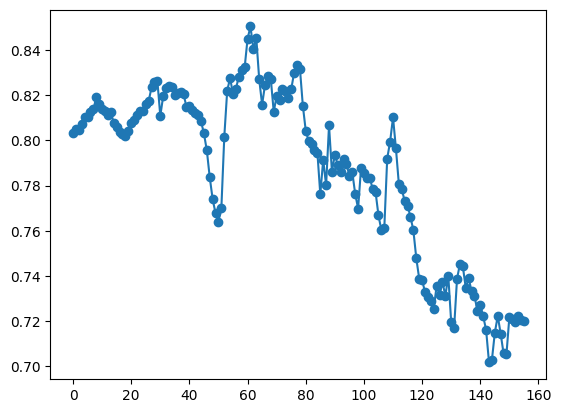

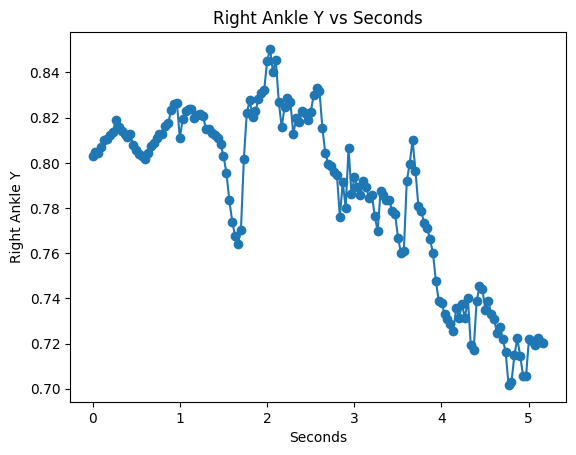

In [21]:
import cv2

import matplotlib.pyplot as plt

# inputFramesPerSecond = 29.97
video_path = r"Input\MarchingVideoToTestHumanPose.mp4"
cap = cv2.VideoCapture(video_path)
inputFramesPerSecond = cap.get(cv2.CAP_PROP_FPS)
cap.release()

print(inputFramesPerSecond)

frameNum = 0
frames = []

secondNum = 0
seconds = []

rightAnkleYPerFrame = []


# Access the results
for result in results:
    frames.append(frameNum)
    seconds.append(secondNum)


    # xy = result.keypoints.xy # x and y coordinates
    # print(xy)
    personIndex = 0
    for personNumber in result:
        for i in range(12,17):
            xyn = result.keypoints.xyn[personIndex][i]  # normalized

            if(i == 11):
                print("Left Hip", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
            if(i == 12):
                print("Right Hip", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
            if(i == 13):
                print("Left Knee", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
            if(i == 14):
                print("Right Knee", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
            if(i == 15):
                print("Left Ankle", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
            if(i == 16):
                print("Right Ankle", xyn, "frame: "+ str(frameNum) + " Person Number: " + str(personIndex))
                # If statement which makes sure the data added is for the right personindex
                if (personIndex == 0):
                    rightAnkleYPerFrame.append((float(xyn[1])))

        personIndex = personIndex + 1

    frameNum = frameNum + 1
    secondNum = secondNum + (1/inputFramesPerSecond)

    # kpts = result.keypoints.data  # x, y, visibility (if available)
    # print(kpts)
print(rightAnkleYPerFrame)    
print(frames)

print(len(rightAnkleYPerFrame))
print(len(frames))


plt.plot(frames, rightAnkleYPerFrame)
plt.scatter(frames, rightAnkleYPerFrame)

plt.figure()
plt.plot(seconds, rightAnkleYPerFrame)
plt.scatter(seconds, rightAnkleYPerFrame)
plt.xlabel('Seconds')
plt.ylabel('Right Ankle Y')
plt.title('Right Ankle Y vs Seconds')

In [ ]:
!git config filter.strip-notebook-output.clean 'jupyter nbconvert --ClearOutputPreprocessor.enabled=True --to=notebook --stdin --stdout --log-level=ERROR'